Exploratory Data Analysis
=============

### 01 - Introduction

In this notebook we will make a Exploratory Data Analysis with the following goals in mind:

* Analyze the features of our clean data in order to understand the relationship between them.
* Answer the following questions:
    1. Es mejor
    2. Es peor
    3. Es igual
* Process the variables for feeding machine learning model/s.

__Importing Libraries__

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from matplotlib import rcParams

%matplotlib inline
# figure size
rcParams['figure.figsize'] = 11,6

### 02 - Knowing our data

Reading data:

In [2]:
loans = pd.read_csv("../data/clean/loans.csv", sep = "^")

In [3]:
loans.head(10)

,funded_amnt_inv,term,issue_d,installment,int_rate,grade,emp_title,emp_length,annual_inc,title,dti,home_ownership,zip_code,addr_state,last_pymnt_amnt,total_pymnt_inv,total_rec_late_fee,application_type,total_acc,loan_status
0,10000.0,60 months,Mar-2016,262.34,19.53%,D,lpn/charge nurse,4 years,52000.0,Other,15.00,OWN,317xx,GA,9575.49,11127.83,0.0,Individual,12.0,Fully Paid
1,35000.0,60 months,Mar-2016,941.96,20.75%,E,Coiler,3 years,85000.0,Debt consolidation,24.98,MORTGAGE,144xx,NY,509.10,37226.47,0.0,Individual,19.0,Fully Paid
2,20000.0,60 months,Mar-2016,416.73,9.16%,B,Reliability Engineer,1 year,77000.0,Home improvement,13.75,MORTGAGE,606xx,IL,416.73,9147.70,0.0,Individual,19.0,Current
3,17475.0,60 months,Mar-2016,384.06,11.47%,B,NaN,NaN,41682.0,Debt consolidation,30.06,MORTGAGE,796xx,TX,384.06,8432.61,0.0,Individual,18.0,Current
4,8000.0,36 months,Mar-2016,255.00,9.16%,B,Technician,10+ years,72000.0,Debt consolidation,22.63,RENT,217xx,MD,255.00,5601.86,0.0,Individual,12.0,Current
5,14400.0,36 months,Mar-2016,469.74,10.75%,B,Coder,10+ years,85000.0,Business,28.11,MORTGAGE,037xx,NH,10992.93,15673.13,0.0,Individual,33.0,Fully Paid
6,18000.0,60 months,Mar-2016,400.31,11.99%,C,Registered Nurse,6 years,100000.0,Debt consolidation,20.41,MORTGAGE,986xx,WA,14885.49,20465.85,0.0,Individual,40.0,Fully Paid
7,5800.0,36 months,Mar-2016,191.18,11.47%,B,shipping,2 years,21000.0,NaN,16.91,RENT,799xx,TX,191.18,4198.57,0.0,Individual,10.0,Current
8,12500.0,60 months,Mar-2016,293.85,14.46%,C,Occupational Therapist Assisstant,1 year,91000.0,Debt consolidation,11.83,RENT,270xx,NC,293.85,6444.62,0.0,Individual,15.0,Current
9,3000.0,36 months,Mar-2016,93.17,7.39%,A,account sales manager,10+ years,90000.0,Home improvement,1.23,MORTGAGE,184xx,PA,93.17,2047.58,0.0,Individual,25.0,Current


In [4]:
loans.shape

(1765426, 20)

Variable types:

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765426 entries, 0 to 1765425
Data columns (total 20 columns):
funded_amnt_inv       float64
term                  object
issue_d               object
installment           float64
int_rate              object
grade                 object
emp_title             object
emp_length            object
annual_inc            float64
title                 object
dti                   float64
home_ownership        object
zip_code              object
addr_state            object
last_pymnt_amnt       float64
total_pymnt_inv       float64
total_rec_late_fee    float64
application_type      object
total_acc             float64
loan_status           object
dtypes: float64(8), object(12)
memory usage: 269.4+ MB


In [6]:
loans.isnull().sum()

funded_amnt_inv            0
term                       0
issue_d                    0
installment                0
int_rate                   0
grade                      0
emp_title             112310
emp_length            104920
annual_inc                 4
title                  23325
dti                      579
home_ownership             0
zip_code                   1
addr_state                 0
last_pymnt_amnt            0
total_pymnt_inv            0
total_rec_late_fee         0
application_type           0
total_acc                 29
loan_status                0
dtype: int64

### 03 - Loan Status Analysis

Since one of our project main goals is to predict whether a debt is going to be paid or not, this part of the analysis will focus on `loan_status` variable, i. e., the current status of the loan.

__Loan status distribution__:

In [7]:
loans['loan_status'].value_counts()

Current                                                843754
Fully Paid                                             698690
Charged Off                                            182199
Late (31-120 days)                                      21742
In Grace Period                                         11812
Late (16-30 days)                                        4423
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    57
Name: loan_status, dtype: int64

We are going to consider _Does not meet the credit policy. Status:Fully Paid_ as `Fully Paid` and _Does not meet the credit policy. Status:Charged Off_ as `Charged Off` although the do not meet the credit policy.

In [8]:
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Fully Paid", 'loan_status'] = "Fully Paid"
loans.loc[loans['loan_status']=="Does not meet the credit policy. Status:Charged Off", 'loan_status'] = "Charged Off"

In [9]:
loans['loan_status'].value_counts()

Current               843754
Fully Paid            700678
Charged Off           182960
Late (31-120 days)     21742
In Grace Period        11812
Late (16-30 days)       4423
Default                   57
Name: loan_status, dtype: int64

Let's plot the distribution in a barplot:

Text(0.5,1,'Loan Status Count')

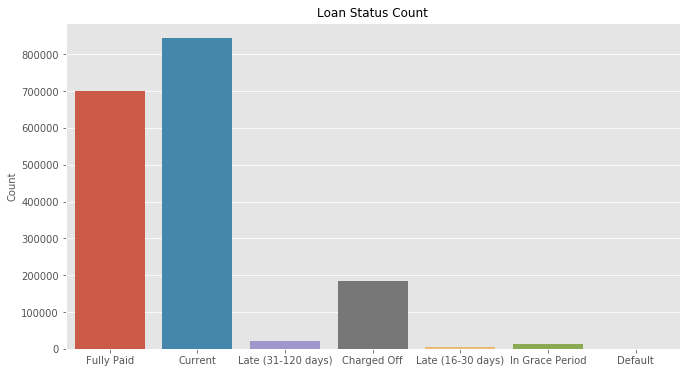

In [17]:
g = sns.countplot(x="loan_status", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Count", fontsize=10)
g.set_title("Loan Status Count", fontsize=12)

__Loan status by funded amount__

Text(0.5,1,'Loan Amount distribution by Status')

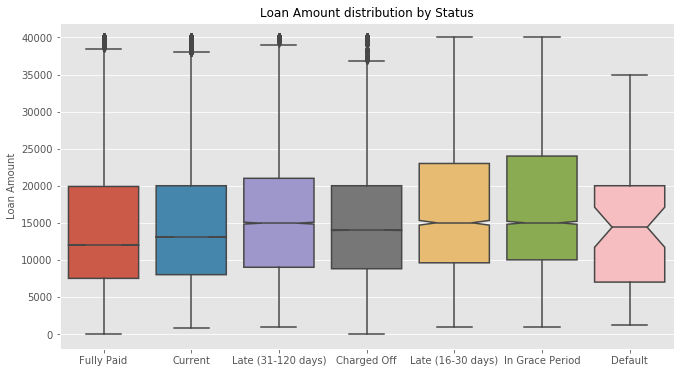

In [18]:
g = sns.boxplot(x="loan_status", y="funded_amnt_inv", 
                data=loans, notch = True) # notch for showing 95% confidence interval for the median

g.set_xlabel("", fontsize=6)
g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount distribution by Status", fontsize=12)

It seems that there is not evidence that _default_ loan amounts are higher or lower than the _fully paid_. 

__Loan status by year__

For this analysis we have to preprocess the `issue_d` variable. We are only interested in the year of the loan and we will not consider it as date or numeric variable but categorical:

In [19]:
loans['issue_d'] = loans['issue_d'].map(lambda x: x[4:])

Text(0.5,1,'Loan Status by Year')

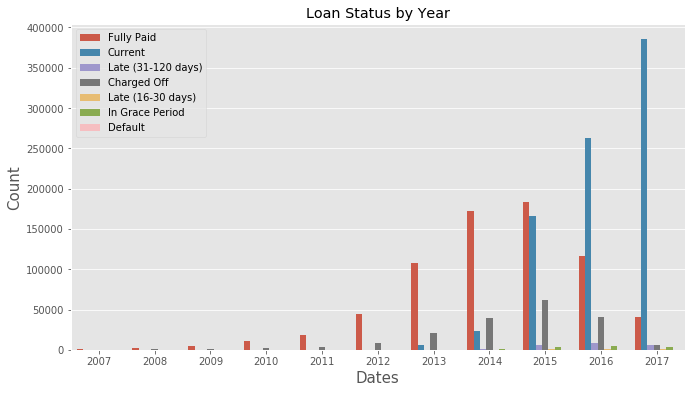

In [20]:
g = sns.countplot(x='issue_d', data=loans,
                  hue='loan_status')

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.legend(loc="upper left")
g.set_title("Loan Status by Year")

Although the number of issued loans has been increased exponentially since 2007, the ratio between those loans that have been paid and those that have not been paid seems to be unvariable regardless of the year and the amount of issued loans.

__Unpaid loans by year__

In [21]:
loans[(loans['loan_status']=="Charged Off") | (loans['loan_status']=="Default")].shape

(183017, 20)

Text(0.5,1,'Defaults by Year')

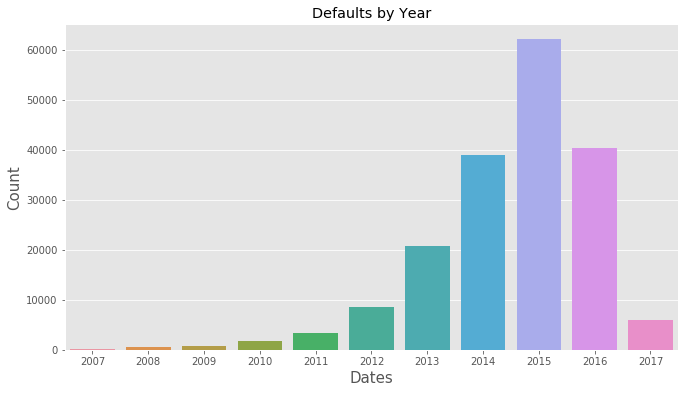

In [22]:
g = sns.countplot(x="issue_d", data=loans[(loans['loan_status']=="Charged Off") | 
                                          (loans['loan_status']=="Default")])

g.set_xlabel("Dates", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Defaults by Year")

__Loan_status by interest_rate__:

We have to take the number without the percentage symbol and then transform to float for ploting loan_status by int_rate:

In [33]:
loans['int_rate'] = loans['int_rate'].map(lambda x: float(x[:-1]))

Text(0.5,1,'Loan Interest Rate distribution by Status')

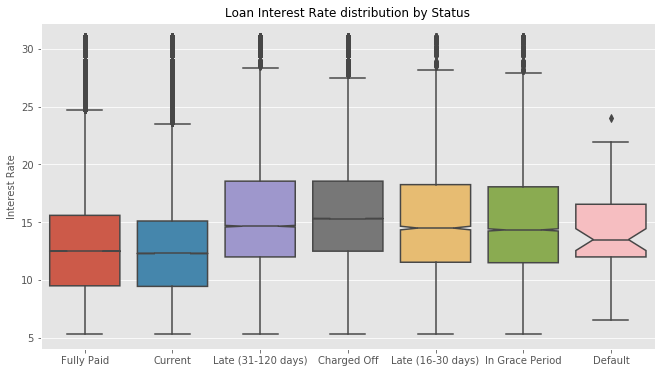

In [35]:
g = sns.boxplot(x="loan_status", y="int_rate", 
                data=loans, notch = True) # notch for showing 95% confidence interval for the median

g.set_xlabel("", fontsize=6)
g.set_ylabel("Interest Rate", fontsize=10)
g.set_title("Loan Interest Rate distribution by Status", fontsize=12)

__Loan_status and Grade__ cross tabulation:

In [29]:
pd.crosstab(loans['grade'], loans['loan_status']).\
    style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
grade,,,,,,,
A,9417,150045,3,136329,702,247,1107
B,34592,259878,11,219686,2629,956,4440
C,55644,264083,24,190507,4089,1477,7379
D,42168,109539,13,95537,2454,947,4720
E,26738,43829,5,41632,1326,489,2662
F,11176,12240,1,13546,442,221,999
G,3225,4140,0,3441,170,86,435


__Loan_status and home_ownership__ cross tabulation:

In [37]:
pd.crosstab(loans['home_ownership'], loans['loan_status']).\
    style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
home_ownership,,,,,,,
ANY,20,378,0,93,5,1,11
MORTGAGE,78604,415339,18,361495,5502,2054,9218
NONE,8,3,0,43,0,0,0
OTHER,38,0,0,144,0,0,0
OWN,19551,98088,8,70818,1322,587,2555
RENT,84739,329946,31,268085,4983,1781,9958


__Installment__:

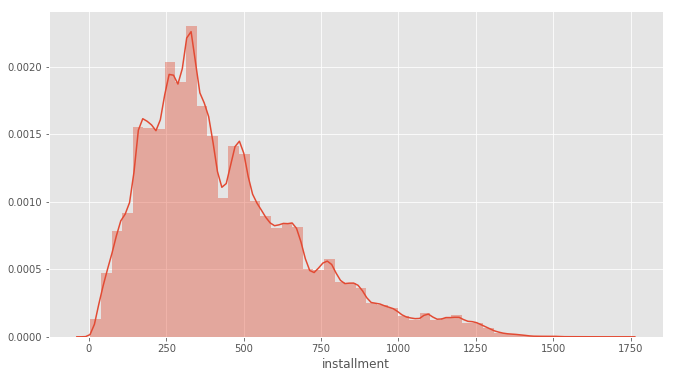

In [42]:
sns.distplot(loans['installment'])

Text(0.5,1,'Loan Interest Rate distribution by Status')

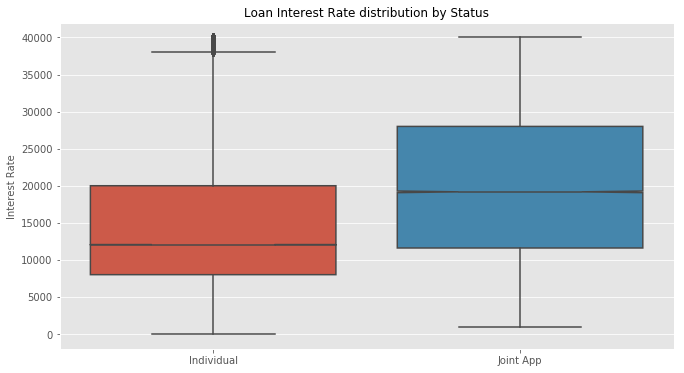

In [47]:
g = sns.boxplot(x="application_type", y="funded_amnt_inv", 
                data=loans, notch = True) # notch for showing 95% confidence interval for the median

g.set_xlabel("", fontsize=6)
g.set_ylabel("Interest Rate", fontsize=10)
g.set_title("Loan Interest Rate distribution by Status", fontsize=12)

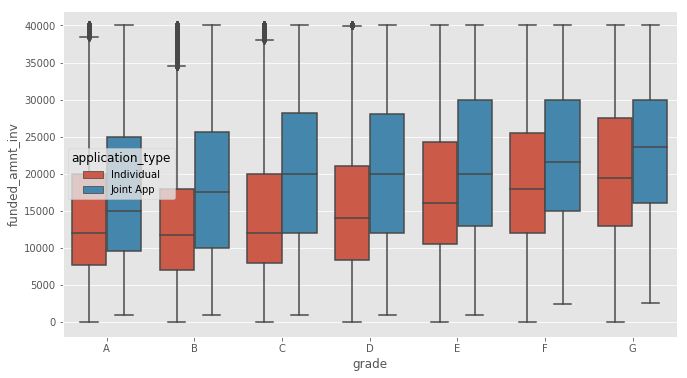

In [51]:
sns.boxplot(x="grade", y="funded_amnt_inv", data=loans, 
            hue="application_type", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

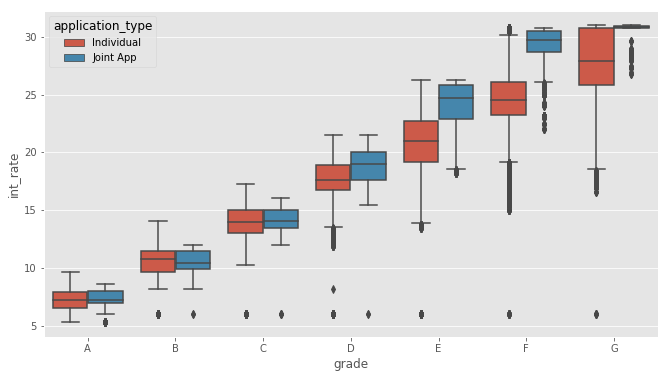

In [52]:
sns.boxplot(x="grade", y="int_rate", data=loans, 
            hue="application_type", order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [54]:
numeric_variables = ['funded_amnt_inv', 'installment', 'int_rate', 'annual_inc', 'dti', 
                     'last_pymnt_amnt', 'total_pymnt_inv', 'total_rec_late_fee', 'total_acc']

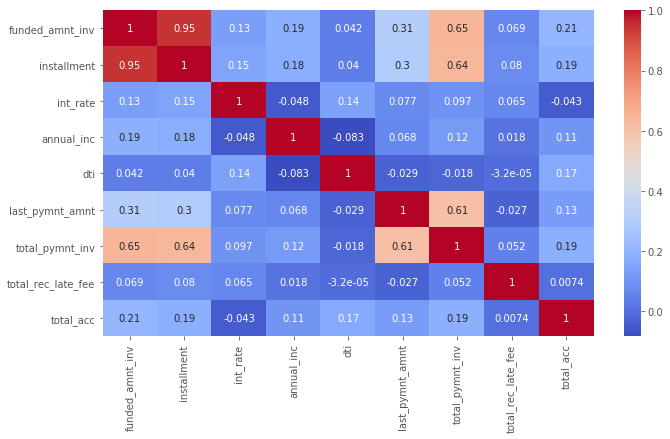

In [55]:
sns.heatmap(loans[numeric_variables].corr(),cmap="coolwarm",annot=True)

### 03 - Preprocessing

#### 3.1 - Loan Status:

In [103]:
loans['loan_status'].value_counts()

Current                                                843754
Fully Paid                                             698690
Charged Off                                            182199
Late (31-120 days)                                      21742
In Grace Period                                         11812
Late (16-30 days)                                        4423
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    57
Name: loan_status, dtype: int64

`loan_status` is the current status of the loan. This is the variable we want to predict in our machine learning model. For this variable, we are going to considerar three labels:
- 0: loans that have already been paid.
- 1: default or charged off loans.
- 2: current loans (rest of the cases), where we don't know if they are going to be paid or not.

We will use labels 0 and 1 for training and testing our model. Label 2 is going to use just for predicting.

In [104]:
def process_loan_status(loan_status):
    
    loan_status_dict = {
    "Current": 2,
    "Fully Paid": 0,
    "Charged Off": 1,
    "Late (31-120 days)": 2,
    "In Grace Period": 2,
    "Late (16-30 days)": 2,
    "Does not meet the credit policy. Status:Fully Paid": 0,
    "Does not meet the credit policy. Status:Charged Off": 1,
    "Default": 1
    }
    
    return loan_status_dict[loan_status]

In [105]:
loans['loan_status'] = loans['loan_status'].map(process_loan_status).\
                            astype('category')

Text(0.5,1,'Loan Status Count')

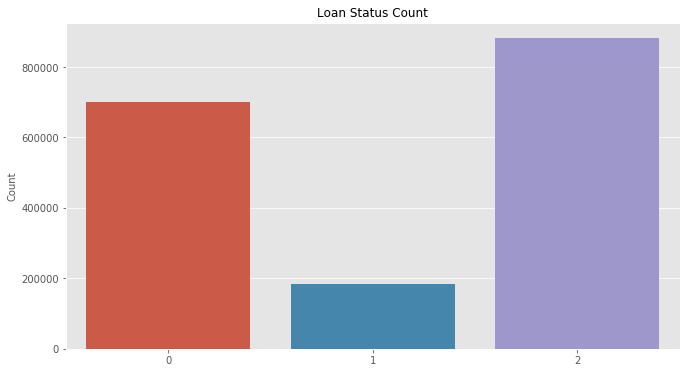

In [117]:
g = sns.countplot(x="loan_status", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Count", fontsize=10)
g.set_title("Loan Status Count", fontsize=12)

#### 3.2 - Categorical Variables

In [197]:
categorical_variables = ['term', 'grade', 'emp_title', 'emp_length', #'title', 
                         'home_ownership', 'zip_code', 'addr_state', 'application_type']

In [149]:
for variable in categorical_variables:
    number_of_categories = loans[variable].unique().size
    print("{}: {} categories".format(variable, number_of_categories))

term: 2 categories
grade: 7 categories
emp_title: 449773 categories
emp_length: 12 categories
title: 63156 categories
home_ownership: 6 categories
zip_code: 954 categories
addr_state: 51 categories
application_type: 2 categories


Too many categories for `emp_title` and `title`. Let's take a look at these two variables:

__emp_title__:

In [152]:
loans['emp_title'].value_counts().head(10)

Teacher             30145
Manager             26290
Owner               16496
Registered Nurse    12234
RN                  11756
Supervisor          11230
Driver              10445
Sales               10131
Project Manager      8656
Office Manager       7553
Name: emp_title, dtype: int64

In [167]:
loans.loc[~((loans['emp_title'] == 'Teacher') |
            (loans['emp_title'] == 'Manager') | 
            (loans['emp_title'] == 'Owner')),'emp_title'] = 'Other'

In [168]:
loans['emp_title'].value_counts()

Other      1692495
Teacher      30145
Manager      26290
Owner        16496
Name: emp_title, dtype: int64

__title__:

In [176]:
loans['title'].value_counts().head(20)

Debt consolidation           893651
Credit card refinancing      341989
Home improvement             104689
Other                         92691
Major purchase                33218
Medical expenses              18766
Business                      16221
Debt Consolidation            15763
Car financing                 15547
Vacation                      10942
Moving and relocation         10685
Home buying                    7284
Consolidation                  5385
debt consolidation             4837
Debt Consolidation Loan        3804
Credit Card Consolidation      2360
consolidation                  2175
Personal Loan                  2133
Consolidation Loan             1778
Home Improvement               1773
Name: title, dtype: int64

In [189]:
loans = loans.drop('title', axis=1)

#### 3.3 - Dates

We have just one date variable, `issue_d`. We are only interested in the year of the loan and we will consider it as categorical variable:

In [136]:
loans['issue_d'] = loans['issue_d'].map(lambda x: x[4:])

In [137]:
loans['issue_d'] = loans['issue_d'].astype('category')

#### 3.4 - Numeric Variables

The only variable we are going to process in this part is the interest rate on the loan (`int_rate`). We have to take the number without the percentage symbol and then transform to float:

In [132]:
loans['int_rate'] = loans['int_rate'].map(lambda x: float(x[:-1]))

#### 3.5 - Dealing with NA's

In [194]:
loans = loans.fillna(method = 'ffill')

In [195]:
loans.isnull().sum()

funded_amnt_inv       0
term                  0
issue_d               0
installment           0
int_rate              0
grade                 0
emp_title             0
emp_length            0
annual_inc            0
dti                   0
home_ownership        0
zip_code              0
addr_state            0
last_pymnt_amnt       0
total_pymnt_inv       0
total_rec_late_fee    0
application_type      0
total_acc             0
loan_status           0
dtype: int64

In [198]:
pd.get_dummies(loans, columns = categorical_variables)

,funded_amnt_inv,issue_d,installment,int_rate,annual_inc,dti,last_pymnt_amnt,total_pymnt_inv,total_rec_late_fee,total_acc,...,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,application_type_Individual,application_type_Joint App
0,10000.0,2016,262.34,19.53,52000.0,15.00,9575.49,11127.83,0.0,12.0,...,0,0,0,0,0,0,0,0,1,0
1,35000.0,2016,941.96,20.75,85000.0,24.98,509.10,37226.47,0.0,19.0,...,0,0,0,0,0,0,0,0,1,0
2,20000.0,2016,416.73,9.16,77000.0,13.75,416.73,9147.70,0.0,19.0,...,0,0,0,0,0,0,0,0,1,0
3,17475.0,2016,384.06,11.47,41682.0,30.06,384.06,8432.61,0.0,18.0,...,1,0,0,0,0,0,0,0,1,0
4,8000.0,2016,255.00,9.16,72000.0,22.63,255.00,5601.86,0.0,12.0,...,0,0,0,0,0,0,0,0,1,0
5,14400.0,2016,469.74,10.75,85000.0,28.11,10992.93,15673.13,0.0,33.0,...,0,0,0,0,0,0,0,0,1,0
6,18000.0,2016,400.31,11.99,100000.0,20.41,14885.49,20465.85,0.0,40.0,...,0,0,0,0,1,0,0,0,1,0
7,5800.0,2016,191.18,11.47,21000.0,16.91,191.18,4198.57,0.0,10.0,...,1,0,0,0,0,0,0,0,1,0
8,12500.0,2016,293.85,14.46,91000.0,11.83,293.85,6444.62,0.0,15.0,...,0,0,0,0,0,0,0,0,1,0
9,3000.0,2016,93.17,7.39,90000.0,1.23,93.17,2047.58,0.0,25.0,...,0,0,0,0,0,0,0,0,1,0


__funded_amnt_inv__:

`funded_amnt_inv` is the total amount committed by investors for that loan at that point in time. We will consider this variable as numeric. Let's take a look at its distribution and the main statistical values:

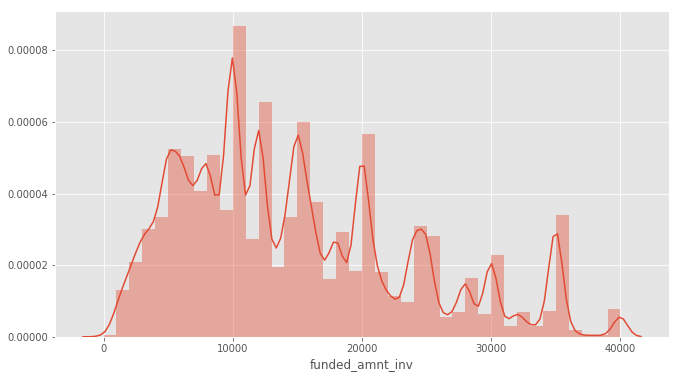

In [114]:
sns.distplot(loans['funded_amnt_inv'], bins = 40)

In [116]:
loans['funded_amnt_inv'].describe()

count    1.765426e+06
mean     1.474341e+04
std      8.888966e+03
min      0.000000e+00
25%      8.000000e+03
50%      1.250000e+04
75%      2.000000e+04
max      4.000000e+04
Name: funded_amnt_inv, dtype: float64

Text(0.5,1,'Loan Amount distribution by Status')

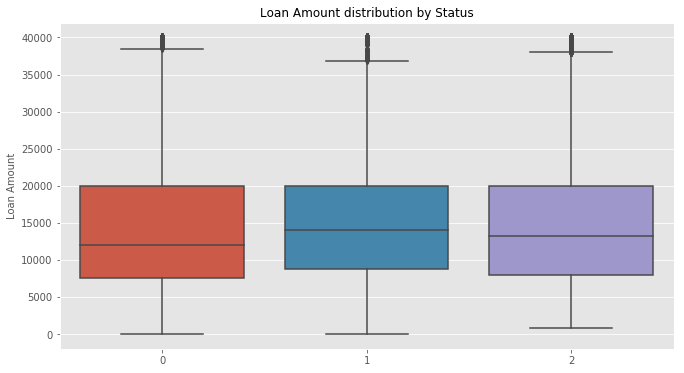

In [119]:
g = sns.boxplot(x="loan_status", y="funded_amnt_inv", data=loans)

g.set_xlabel("", fontsize=6)
g.set_ylabel("Loan Amount", fontsize=10)
g.set_title("Loan Amount distribution by Status", fontsize=12)

__term__:

`term` is the number of payments on the loan. Values are in months and can be either 36 or 60.

In [120]:
loans['term'].value_counts()

 36 months    1265083
 60 months     500343
Name: term, dtype: int64

In [131]:
pd.crosstab(loans['term'], loans['loan_status']).\
    style.background_gradient(cmap=sns.light_palette("orange", as_cmap=True))

loan_status,0,1,2
term,,,
36 months,559105,111918,594060
60 months,141573,71099,287671
